IMPORTING LIBRARIES

In [8]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

READING DATASET

In [9]:
df = pd.read_csv("Advertising.csv")

In [10]:
modified_df = df.drop("Unnamed: 0",axis = 'columns')

In [11]:
modified_df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


DESCRIBING df

In [12]:
modified_df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


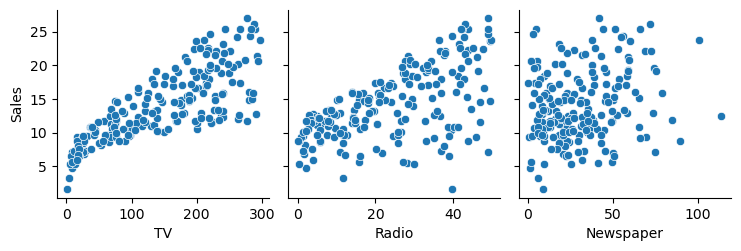

In [13]:
sns.pairplot(modified_df, x_vars=['TV','Radio','Newspaper'], y_vars = 'Sales', kind = 'scatter')

model can be predicted using parameter "TV" since others(Radio,Newspaper) are scattered more 

<Axes: >

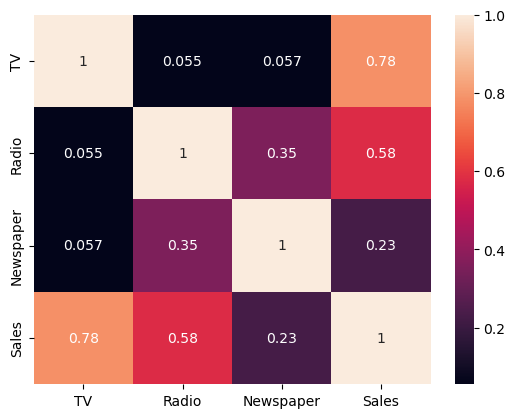

In [14]:
sns.heatmap(modified_df.corr(),annot=True)

sales is highly correlated with TV

SPLITTING DATA INTO TRAINING AND TESTING

In [15]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(modified_df[['TV']],modified_df[['Sales']], test_size = 0.3, random_state = 0)

In [16]:
print(X_train)

        TV
131  265.2
96   197.6
181  218.5
19   147.3
153  171.3
..     ...
67   139.3
192   17.2
117   76.4
47   239.9
172   19.6

[140 rows x 1 columns]


In [17]:
print(X_test)

        TV
18    69.2
170   50.0
107   90.4
98   289.7
177  170.2
182   56.2
5      8.7
146  240.1
12    23.8
152  197.6
61   261.3
125   87.2
180  156.6
154  187.8
80    76.4
7    120.2
33   265.6
130    0.7
37    74.7
74   213.4
183  287.6
145  140.3
45   175.1
159  131.7
60    53.5
123  123.1
179  165.6
185  205.0
122  224.0
44    25.1
16    67.8
55   198.9
150  280.7
111  241.7
22    13.2
189   18.7
129   59.6
4    180.8
83    68.4
106   25.0
134   36.9
66    31.5
26   142.9
113  209.6
168  215.4
63   102.7
8      8.6
75    16.9
118  125.7
143  104.6
71   109.8
124  229.5
184  253.8
97   184.9
149   44.7
24    62.3
30   292.9
160  172.5
40   202.5
56     7.3


In [18]:
print(y_train)

     Sales
131   12.7
96    11.7
181   12.2
19    14.6
153   19.0
..     ...
67    13.4
192    5.9
117    9.4
47    23.2
172    7.6

[140 rows x 1 columns]


In [19]:
print(y_test)

     Sales
18    11.3
170    8.4
107    8.7
98    25.4
177   11.7
182    8.7
5      7.2
146   13.2
12     9.2
152   16.6
61    24.2
125   10.6
180   10.5
154   15.6
80    11.8
7     13.2
33    17.4
130    1.6
37    14.7
74    17.0
183   26.2
145   10.3
45    14.9
159   12.9
60     8.1
123   15.2
179   12.6
185   22.6
122   11.6
44     8.5
16    12.5
55    23.7
150   16.1
111   21.8
22     5.6
189    6.7
129    9.7
4     12.9
83    13.6
106    7.2
134   10.8
66     9.5
26    15.0
113   15.9
168   17.1
63    14.0
8      4.8
75     8.7
118   15.9
143   10.4
71    12.4
124   19.7
184   17.6
97    15.5
149   10.1
24     9.7
30    21.4
160   14.4
40    16.6
56     5.5


In [20]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [21]:
res = model.predict(X_test)
print(res)

[[10.48116264]
 [ 9.60152727]
 [11.4524267 ]
 [20.58322509]
 [15.1084112 ]
 [ 9.8855762 ]
 [ 7.70939494]
 [18.31083372]
 [ 8.40119151]
 [16.36372418]
 [19.28209777]
 [11.3058208 ]
 [14.48533615]
 [15.91474363]
 [10.81102591]
 [12.81769409]
 [19.47909945]
 [ 7.3428802 ]
 [10.73314153]
 [17.08759078]
 [20.48701497]
 [13.73856237]
 [15.33290148]
 [13.34455903]
 [ 9.76187747]
 [12.95055569]
 [14.89766523]
 [16.70275031]
 [17.57322281]
 [ 8.46075015]
 [10.41702256]
 [16.42328282]
 [20.17089601]
 [18.38413667]
 [ 7.91555948]
 [ 8.16753836]
 [10.04134496]
 [15.59404323]
 [10.44451117]
 [ 8.45616872]
 [ 9.00135939]
 [ 8.75396194]
 [13.85767966]
 [16.91349628]
 [17.17921947]
 [12.01594311]
 [ 7.70481351]
 [ 8.08507255]
 [13.06967298]
 [12.10299036]
 [12.34122494]
 [17.82520169]
 [18.93849021]
 [15.78188203]
 [ 9.35871126]
 [10.16504368]
 [20.72983099]
 [15.21378419]
 [16.58821446]
 [ 7.64525486]]


In [22]:
y_test_array = np.asarray(y_test)
y_test_array

array([[11.3],
       [ 8.4],
       [ 8.7],
       [25.4],
       [11.7],
       [ 8.7],
       [ 7.2],
       [13.2],
       [ 9.2],
       [16.6],
       [24.2],
       [10.6],
       [10.5],
       [15.6],
       [11.8],
       [13.2],
       [17.4],
       [ 1.6],
       [14.7],
       [17. ],
       [26.2],
       [10.3],
       [14.9],
       [12.9],
       [ 8.1],
       [15.2],
       [12.6],
       [22.6],
       [11.6],
       [ 8.5],
       [12.5],
       [23.7],
       [16.1],
       [21.8],
       [ 5.6],
       [ 6.7],
       [ 9.7],
       [12.9],
       [13.6],
       [ 7.2],
       [10.8],
       [ 9.5],
       [15. ],
       [15.9],
       [17.1],
       [14. ],
       [ 4.8],
       [ 8.7],
       [15.9],
       [10.4],
       [12.4],
       [19.7],
       [17.6],
       [15.5],
       [10.1],
       [ 9.7],
       [21.4],
       [14.4],
       [16.6],
       [ 5.5]])

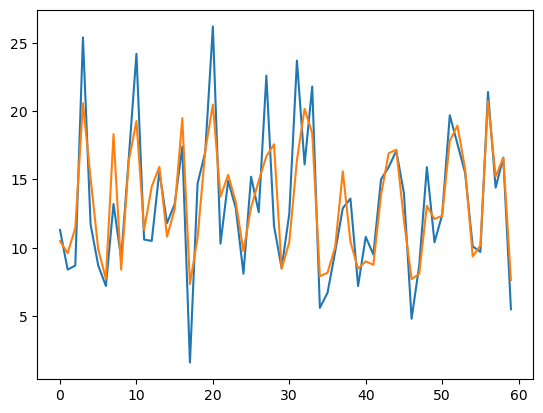

In [23]:
plt.plot(y_test_array) #Blue
plt.plot(res) #Orange
